Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

Cargo Datos

In [20]:
df = df = pd.read_csv('./water_potability.csv')
df=df.dropna()
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1241,5.574117,193.158076,17546.403256,9.219973,366.197418,538.532518,13.951332,67.142033,5.152528,0
2925,11.563169,174.942862,19359.428816,6.495619,332.446490,366.312672,17.529526,38.431200,5.107236,0
2328,6.071839,217.826531,17162.753927,3.521125,319.037346,612.094926,16.542239,64.826308,2.691610,1
2986,3.832917,218.723840,23535.028901,6.475402,352.505898,421.183478,19.273561,58.903698,4.768660,0
3212,5.913755,175.326062,12044.624691,8.368785,347.880372,380.967166,12.530827,65.194053,4.023776,1
2561,6.069364,200.916263,9323.218290,9.387522,325.466983,450.441352,12.423380,73.914026,4.914809,0
240,9.380658,265.061216,15156.789834,4.271545,333.334469,503.170615,11.286410,99.016003,4.034349,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3128,4.959853,215.854869,9887.830755,6.954231,379.504731,527.479694,14.326638,52.388849,3.455045,1
1318,6.724639,223.175415,41552.019664,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415,0


Divido entre agua potable o no potable

In [21]:
potable = df[df['Potability']==1]
No_potable= df[df['Potability']==0]

Grafico Potable vs No Potable

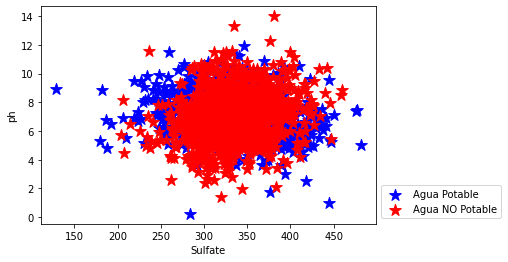

In [22]:
plt.scatter(potable["Sulfate"],potable["ph"],marker="*",s=150,color="blue",label="Agua Potable")
plt.scatter(No_potable["Sulfate"],No_potable["ph"],marker="*",s=150,color="red",label="Agua NO Potable")
plt.ylabel("ph")
plt.xlabel("Sulfate")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()


Preparo los datos

In [24]:
df = pd.get_dummies(data=df, drop_first=True)

In [115]:
parametros = df.drop(columns='Potability')
clase = df.Potability

Creacion del Modelo KNN

In [116]:
model = KNeighborsClassifier(n_neighbors=10)

In [117]:
model.fit(parametros,clase)

KNeighborsClassifier(n_neighbors=10)

Prediccion Test

In [118]:
a = parametros.sample()

In [119]:
a

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred
990,5.477283,165.436093,29046.083515,5.523011,370.893085,488.774595,17.265186,80.234797,6.357439,0


Prediccion

In [120]:
y_pred = model.predict(a)
print("Es Potable",(y_pred))

Es Potable [0]


Probabilidad de que sea Potable

In [121]:
print("Probabilidad de ser potable: ",(model.predict_proba(a)))

Probabilidad de ser potable:  [[0.9 0.1]]


Comparacion del Modelo con los hechos

In [122]:
df['pred']= y_pred[0]
df.sample(10)[['Potability','pred']]

,Potability,pred
94,0,0
348,1,0
470,0,0
1791,0,0
854,0,0
1835,0,0
793,1,0
2343,1,0
1380,0,0
1474,0,0
